# 本福特自动机

## 问题

对于任意一个正整数 $x_0$，对它反复乘 $2$，进行 $t$ 次并每次都记录下所得的数字的首位数字。

比如，$x_0 = 7$，那么连续乘 $2$ 得到的序列为

$7, 14, 28, 56, 112, 224, 448, 896, \dots$

首位数字为

$7, 1, 2, 5, 1, 2, 4, 8, \dots$

现在我们从 $x_0 = 1 \dots 9$ 开始试验，并把所得的数的首位数字合在一起，这些首位数字的分布是什么样的？

### 讨论

* 如果 $t = 0$，我们会得到 $1$ 到 $9$ 这九个原来的数字，显然这是一个均匀分布。
* 但如果 $t$ 很大的话，得到的首位数字是否还能保持一个 $1$ 到 $9$ 之间的均匀分布呢？

## 编程问题

计算以上过程在 $t = 100$ 后得到的分布。 

你可以用以下模板入手，加入其中实现的细节，比如
 * 想一想，如何计算一个数的首位数字？

最后几行是调用 `matplotlib` 来绘制直方图，如果不熟悉，可以不用管，直接用即可。

1:     1    0.001
2:     2    0.002
3:     1    0.001
4:     3    0.003
5:     1    0.001
6:     2    0.002
7:     1    0.001
8:     4    0.004
9:     1    0.001


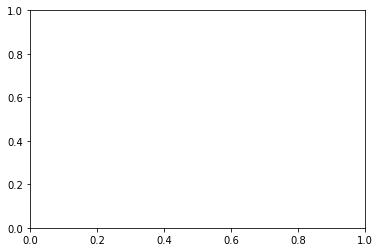

In [17]:
'''
问题：对于任意一个正整数 x0，对它乘 2，重复进行 tmax = 100 次并都记录下所得的数字的首位数字。
从 x0 = 1, 2, ..., 9 开始试验，并把所得的数的首位数合在一起，这些首位数字的分布是什么样的？

编程练习：
 * 修改 get_leading_digit(x) 函数，使它能返回一个正整数 x 的首位数字。
 * 跑通程序，运行结果
'''

def get_leading_digit(x):
    ''' 计算一个整数 x 的首位数字 '''
    if x < 10: # 如果 x 在 1 到 9 之间，直接返回 x
        return x
    else:
        # 【编程任务】
        # 请在这里加入你的代码，计算大于等于10的数的首位数字
        # 提示：可以用循环逐渐缩小数字使其落在 [1, 10) 之间
        pass

def multiply(x0, tmax):
    ''' 对 x0，计算连续 tmax 次乘以 2 后得到的数的首位数字的列表 '''
    result = [x0] # 存储结果的列表，先把初始值 x0 放进列表
    
    x = x0
    for i in range(tmax):
        x *= 2 # 每次把 x 乘以
        leading_digit = get_leading_digit(x) # 计算首位数字
        result.append(leading_digit) # 把首数字加入计算结果的列表中 

    return result

def simulation(tmax):
    ''' 对 1-9 中每个数，计算连续 tmax 次乘 2 后得到的数的首数字的列表 '''
    result = [] # 用于存储结果的列表
    for x0 in range(1, 10): # 从 1 到 9 分别进行模拟
        result_of_x0 = multiply(x0, tmax) # 计算从 x0 开始模拟的结果
        result.extend(result_of_x0) # 把结果追加到总结果的列表里
    return result

# 模拟 100 步的结果，把结果存储在 result 里面
result = simulation(100)

for i in range(1, 10): # 对首位数字 i = 1, ..., 9 循环
    ni = result.count(i) # 结果中首数字为 i 的出现次数
    fi = ni/len(result) # 首数字为 i 出现的几率
    print(f"{i}: {ni:5} {fi:8.3f}") # 打印 "数字: 出现次数 频率"

# 把首位数字的结果以直方图的形式画出来，可以在命令行和 Jupyter 中运行
try:
    # 导入画图包
    import matplotlib.pyplot as plt
    # 把首位数字的列表的直方图画出来
    plt.hist(result, bins=9, range=(0.5,9.5), rwidth=0.9)
    plt.show()
except:
    pass

## 深度探讨

如果你把这程序编出来并跑通了，那非常祝贺你！

不过，编程只是我们用计算机做实验的一个手段。更重要的是要建立理论来理解这个实验的结果。而这往往需要一些数学才行。

* 你可能会对你得到的结果吃惊。为了理解这个结果，最好的办法是弄个数学模型来帮助自己建立一个比较直观和图像化的理解。比如思考一下在反复乘 $2$ 的过程中，我们操作的数字的对数是如何变化的？它在数轴上是怎么运动的？

* 如果我们每次乘的不是 2，而是 3 或者是 1.23，得到的结果会怎么变化？

* 虽然我们这个过程比较简单，但本质上它也是一个动力学系统，和牛顿方程研究的问题很相似。为了研究动力学系统中的统计分布，物理学家们在上世纪创立了统计力学。统计力学研究分布的一个主要手段是**系综**，也就是考虑一群相似的系统随时间是怎么演化的。它的一个基本假设是在平衡态时，系综平均和时间平均是等价的，思考一下，这个问题里什么是时间平均，什么是系综平均？它们等价吗？（这个问题有点狡诈，要准确定义这里的系综并不是那么简单的。）